In [1]:
pip install yfinance


In [3]:
import yfinance as yf
import pandas as pd
import os

# Top 10 companies
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JNJ', 'JPM']

# Download data from Yahoo Finance
data = yf.download(tickers, start="2022-01-01", end="2025-01-01", group_by='ticker')

# Create merged DataFrame
merged_df = pd.DataFrame()

for ticker in tickers:
    df = data[ticker].copy()
    df['Ticker'] = ticker
    df.reset_index(inplace=True)
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Save merged dataset to CSV
merged_df.to_csv("merged_top10_stocks.csv", index=False)
print("✅ Merged dataset saved as merged_top10_stocks.csv")

[*********************100%***********************]  10 of 10 completed


✅ Merged dataset saved as merged_top10_stocks.csv


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/merged_top10_stocks.csv')

# Check for missing values
missing_summary = df.isnull().sum()
print("Missing values in each column:\n", missing_summary)

# Option 1: Drop rows with missing values (simple and clean)
df_cleaned = df.dropna()

# Option 2 (Alternative): Fill missing values (if required)
# df['Close'] = df['Close'].fillna(method='ffill')  # Forward fill

# Save cleaned data
df_cleaned.to_csv('/content/merged_top10_stocks.csv', index=False)
print("\n✅ Cleaned data saved to data/cleaned_stocks.csv")


Missing values in each column:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Ticker    0
dtype: int64

✅ Cleaned data saved to data/cleaned_stocks.csv


In [9]:
# Select only necessary columns
df = df_cleaned[['Date', 'Close', 'Volume', 'Ticker']]

# Feature Engineering: Calculate Daily Return per Ticker
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])

df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

# 7-day Moving Average
df['7D MA'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=7).mean())

# Ensure the 'data' directory exists before saving
if not os.path.exists('data'):
    os.makedirs('data')

# Save
df.to_csv('data/engineered_stocks.csv', index=False)
print("\n✅ Feature engineered data saved to data/engineered_stocks.csv")


✅ Feature engineered data saved to data/engineered_stocks.csv


<ipython-input-9-224a509d00f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


Data Integrity & Consistency

In [10]:
# Remove duplicates
df = df.drop_duplicates()

# Check for consistency in ticker names
print("Unique tickers in dataset:", df['Ticker'].unique())

# Ensure date order
df = df.sort_values(by=['Ticker', 'Date'])

# Final check for nulls
print("\nAny missing values left?", df.isnull().values.any())


Unique tickers in dataset: ['AAPL' 'AMZN' 'BRK-B' 'GOOGL' 'JNJ' 'JPM' 'META' 'MSFT' 'NVDA' 'TSLA']

Any missing values left? True


**Summary Statistics & Insights**

In [11]:
# Summary statistics
print("\nSummary Statistics:")
print(df.groupby('Ticker')['Close'].describe())

# Volume stats
print("\nAverage trading volume:")
print(df.groupby('Ticker')['Volume'].mean())



Summary Statistics:
        count        mean         std         min         25%         50%  \
Ticker                                                                      
AAPL    753.0  176.563679   29.570501  123.421242  153.871704  171.708908   
AMZN    753.0  144.117442   35.212811   81.820000  115.010002  140.389999   
BRK-B   753.0  355.668658   57.768720  264.000000  310.309998  344.709991   
GOOGL   753.0  131.949496   27.316068   83.033020  109.814980  130.904160   
JNJ     753.0  154.152501    6.938093  138.898849  149.492691  154.019363   
JPM     753.0  152.547831   38.769517   95.613792  123.328613  138.935318   
META    753.0  316.117984  152.526422   88.492943  184.032654  294.989716   
MSFT    753.0  329.669790   71.336391  209.393250  265.680725  320.929688   
NVDA    753.0   54.391689   42.173985   11.214938   19.560999   41.891582   
TSLA    753.0  237.078544   61.177708  108.099998  189.979996  233.190002   

               75%         max  
Ticker               

**Patterns, Trends, and Anomalies**

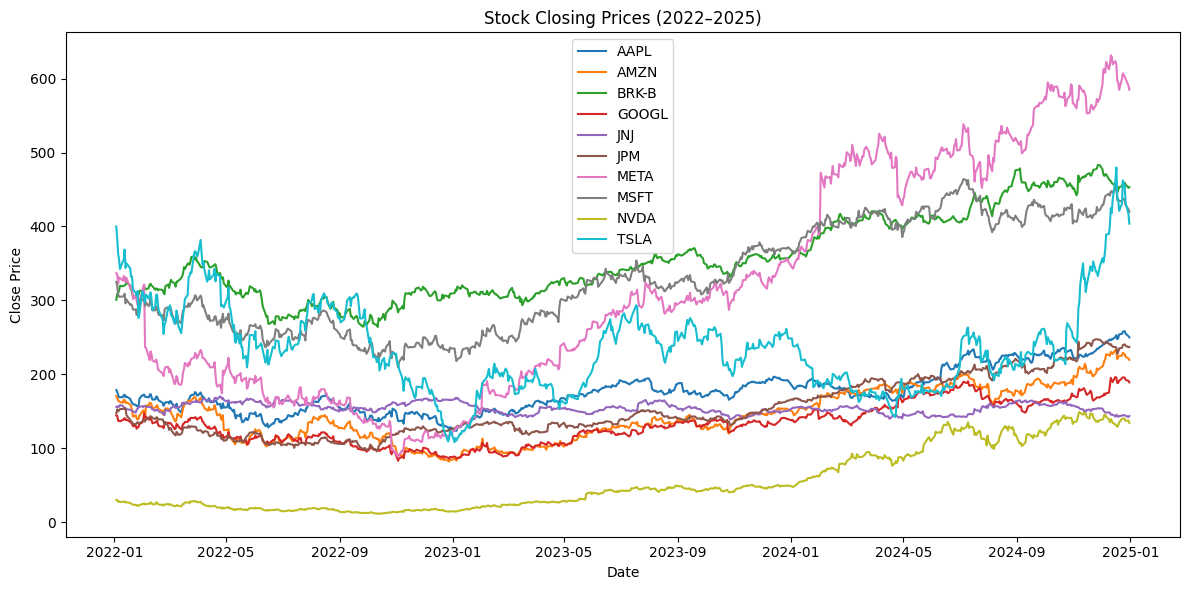

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Close price trends
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)

plt.title("Stock Closing Prices (2022–2025)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


**Handle Outliers & Data Transformations**

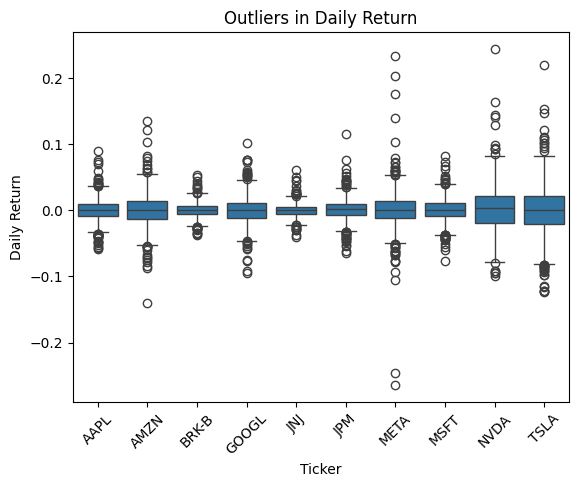

In [13]:
# Detect outliers in daily return
sns.boxplot(data=df, x='Ticker', y='Daily Return')
plt.xticks(rotation=45)
plt.title("Outliers in Daily Return")
plt.show()

# Remove extreme outliers
df = df[(df['Daily Return'] > -0.3) & (df['Daily Return'] < 0.3)]


**Initial Visual Representations**

Line plot for trend

Box plot for volatility

Correlation heatmap

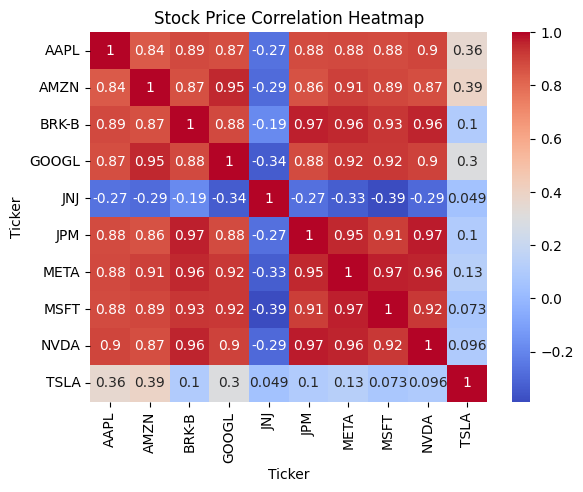

In [14]:
# Correlation heatmap for Close prices
pivot_df = df.pivot_table(index='Date', columns='Ticker', values='Close')
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title("Stock Price Correlation Heatmap")
plt.show()
